In [11]:
import matplotlib.pyplot as plt 
import numpy as np
from skimage.filters import threshold_otsu

In [12]:
import sys  
sys.path.insert(0, '..')

In [13]:
from preprocessing.datamodel import SlideManager
from preprocessing.processing import rgb2gray, apply_image_filters, create_tumor_mask

In [14]:
CAM_BASE_DIR = '/media/nico/data/fourthbrain/project/'
CAM16_DIR = CAM_BASE_DIR + 'CAMELYON16/'

In [15]:
mgr = SlideManager(cam16_dir=CAM16_DIR)

In [16]:
i = 0
level = 3
tile_size=256
overlap = 0
verbose = True
poi = 0.5

In [17]:
slide = mgr.test_slides[i]

In [18]:
# load the slide into numpy array
arr = np.asarray(slide.get_full_slide(level=level))

In [19]:
# convert it to gray scale
arr_gray = rgb2gray(arr)
# calculate otsu threshold
threshold = threshold_otsu(arr_gray)

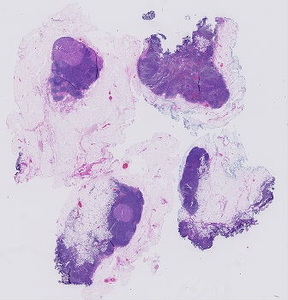

In [20]:
slide.get_thumbnail((300, 300))  # openslide method

In [21]:
mask_filters = apply_image_filters(arr, remove_object_size=5000, remove_holes_size=3000)

Remove Small Objs    | Time: 0:00:00.260089  Type: bool    Shape: (5600, 5376)
Remove Small Holes   | Time: 0:00:00.274255  Type: bool    Shape: (5600, 5376)


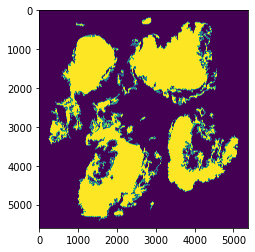

In [22]:
plt.imshow(mask_filters)

In [23]:
tumor_mask = create_tumor_mask(slide, level=level)

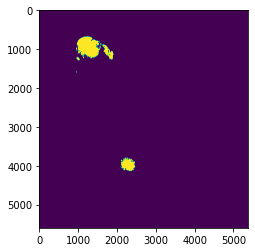

In [24]:
plt.imshow(tumor_mask)